<a href="https://colab.research.google.com/github/stefanoridolfi/Coding_ML/blob/master/MLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        
        # print matrice pesi input - hidden
        #print("matrice pesi input - hidden", self.weights_in_hidden)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
        print("tipo di self.weights_in_hidden=", type(self.weights_in_hidden))
        # print matrice pesi hidden-output
        #print("matrice pesi hidden-output",self.weights_hidden_out )
    def train(self, input_vector, target_vector):
        # input_vector and target_vector can be tuple, list or ndarray
        print(" input_vector originale e tipo",  input_vector, type( input_vector))
        input_vector = np.array(input_vector, ndmin=2).T
        print(" input_vector dopo arrya e tipo",  input_vector, type( input_vector))
        target_vector = np.array(target_vector, ndmin=2).T
        #print("input vector", input_vector.T,"target vector",target_vector.T )
        #print("1111111111111111111111111111111111111111111111111111111111")
        

        output_vector1 = np.dot(self.weights_in_hidden, input_vector)
        print("tipo di output_vector1=", type(output_vector1))
        output_vector_hidden = activation_function(output_vector1)
        #print("output_vector1=", output_vector1.T,"output_vector_hidden= ", output_vector_hidden.T, " Calcolo diretta funz. attivazione sigmoide ",(1 / (1 + np.e ** -output_vector1)) )
        output_vector2 = np.dot(self.weights_hidden_out, output_vector_hidden)
        output_vector_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_vector_network
        # update the weights:
        
        tmp = output_errors * output_vector_network * (1.0 - output_vector_network)     
        
        print("tmp = output_errors * output_vector_network * (1.0 - output_vector_network)  =",tmp, "output_errors=",output_errors, "output_vector_network=",output_vector_network, "1.0 - output_vector_network=", (1.0 - output_vector_network),"FFFF")
        
        tmp = self.learning_rate  * np.dot(tmp, output_vector_hidden.T)
        self.weights_hidden_out += tmp
        # calculate hidden errors:
        hidden_errors = np.dot(self.weights_hidden_out.T, output_errors)
        # update the weights:
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        self.weights_in_hidden += self.learning_rate * np.dot(tmp, input_vector.T)
           
    
    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.weights_in_hidden, input_vector)
        output_vector = activation_function(output_vector)
        
        output_vector = np.dot(self.weights_hidden_out, output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector
            

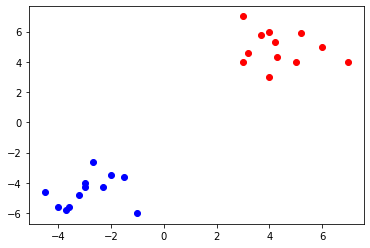

In [68]:
import numpy as np
from matplotlib import pyplot as plt
data1 = [((3, 4), (0.99, 0.01)), ((4.2, 5.3), (0.99, 0.01)), 
         ((4, 3), (0.99, 0.01)), ((6, 5), (0.99, 0.01)), 
         ((4, 6), (0.99, 0.01)), ((3.7, 5.8), (0.99, 0.01)), 
         ((3.2, 4.6), (0.99, 0.01)), ((5.2, 5.9), (0.99, 0.01)), 
         ((5, 4), (0.99, 0.01)), ((7, 4), (0.99, 0.01)), 
         ((3, 7), (0.99, 0.01)), ((4.3, 4.3), (0.99, 0.01))]
data2 = [((-3, -4), (0.01, 0.99)), ((-2, -3.5), (0.01, 0.99)), 
         ((-1, -6), (0.01, 0.99)), ((-3, -4.3), (0.01, 0.99)), 
         ((-4, -5.6), (0.01, 0.99)), ((-3.2, -4.8), (0.01, 0.99)), 
         ((-2.3, -4.3), (0.01, 0.99)), ((-2.7, -2.6), (0.01, 0.99)), 
         ((-1.5, -3.6), (0.01, 0.99)), ((-3.6, -5.6), (0.01, 0.99)), 
         ((-4.5, -4.6), (0.01, 0.99)), ((-3.7, -5.8), (0.01, 0.99))]
data = data1 + data2
np.random.shuffle(data)
points1, labels1 = zip(*data1)
X, Y = zip(*points1)
plt.scatter(X, Y, c="r")
points2, labels2 = zip(*data2)
X, Y = zip(*points2)
plt.scatter(X, Y, c="b")
plt.show()

In [96]:
simple_network = NeuralNetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=2, 
                               no_of_hidden_nodes=2,
                               learning_rate=0.6)
    
size_of_learn_sample = int(len(data)*0.9)
learn_data = data[:size_of_learn_sample]
test_data = data[-size_of_learn_sample:]
#print("__________________________________________________________________")
for i in range(size_of_learn_sample):
    point, label = learn_data[i][0], learn_data[i][1]
    simple_network.train(point, label)
    
for i in range(size_of_learn_sample):
    point, label = learn_data[i][0], learn_data[i][1]
    cls1, cls2 =simple_network.run(point)
    print(point, cls1, cls2, end=": ")
    if cls1 > cls2:
        if label == (0.99, 0.01):
            print("class1 correct", label)
        else:
            print("class2 incorrect", label)
    else:
        if label == (0.01, 0.99):
            print("class1 correct", label)
        else:
            print("class2 incorrect", label)

tipo di self.weights_in_hidden= <class 'numpy.ndarray'>
 input_vector originale e tipo (-4.5, -4.6) <class 'tuple'>
 input_vector dopo arrya e tipo [[-4.5]
 [-4.6]] <class 'numpy.ndarray'>
tipo di output_vector1= <class 'numpy.ndarray'>
tmp = output_errors * output_vector_network * (1.0 - output_vector_network)  = [[-0.11479772]
 [ 0.13372541]] output_errors= [[-0.460766  ]
 [ 0.54039023]] output_vector_network= [[0.470766  ]
 [0.44960977]] 1.0 - output_vector_network= [[0.529234  ]
 [0.55039023]] FFFF
 input_vector originale e tipo (-1, -6) <class 'tuple'>
 input_vector dopo arrya e tipo [[-1]
 [-6]] <class 'numpy.ndarray'>
tipo di output_vector1= <class 'numpy.ndarray'>
tmp = output_errors * output_vector_network * (1.0 - output_vector_network)  = [[-0.11259496]
 [ 0.12854602]] output_errors= [[-0.4528764 ]
 [ 0.51552789]] output_vector_network= [[0.4628764 ]
 [0.47447211]] 1.0 - output_vector_network= [[0.5371236 ]
 [0.52552789]] FFFF
 input_vector originale e tipo (-1.5, -3.6) <cla